<a href="https://colab.research.google.com/github/OLUWAKEMI-AKINSIKU/A-COMPARATIVE-ANALYSIS-OF-MACHINE-LEARNING-MODELS-FOR-HEART-DISEASE-PREDICTION-/blob/main/Copy_of_A_COMPARATIVE_ANALYSIS_OF_MACHINE_LEARNING_MODELS_FOR_HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble	import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
#load dataset

heart= pd.read_csv('/content/heart_disease_uci.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#first five rows of the dataset

print("\n === First Five rows of the dataset ===")
heart.head()



 === First Five rows of the dataset ===


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis


In [4]:
#information about the data

print(f"\nInformation about the data : {heart.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Information about the data : None


In [5]:
#check for summary of the numerical columns

print("\nStatistical Summary of the Numerical Column :")
print(heart.describe())



Statistical Summary of the Numerical Column :
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  

In [6]:
#check for duplicate

print("\nDuplicate values in the dataset :")
print(heart.duplicated().sum())


Duplicate values in the dataset :
0


In [7]:
#check for the data types in the dataset

print("\nData types in the dataset :")
print(heart.dtypes)


Data types in the dataset :
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [8]:
#check for the name of the columns

print("\n Column names :")
print(heart.columns.tolist())


 Column names :
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [9]:
#check for missing values

print("\nMissing values in the dataset :")
print(heart.isna().sum())


Missing values in the dataset :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [10]:
#check for percantage of missing values in each column

print("\nPercentage of missing values in each column :")
print(heart.isna().sum() / len(heart) * 100)


Percentage of missing values in each column :
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [11]:
#identify numeric and categorical column

num_cols = heart.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = heart.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numeric columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [12]:
#check how many of them have missing values

num_missing_cols = heart[num_cols].isna().sum()[heart[num_cols].isna().sum() > 0].count()
cat_missing_cols = heart[cat_cols].isna().sum()[heart[cat_cols].isna().sum() > 0].count()

print(f"Number of numerical columns with missing values: {num_missing_cols}")
print(f"Number of categorical columns with missing values: {cat_missing_cols}")


Number of numerical columns with missing values: 5
Number of categorical columns with missing values: 5


In [13]:
#check for total columns with missing values

total_missing_cols = heart.isna().sum()[heart.isna().sum() > 0].count()
print(f"Total number of columns with missing values: {total_missing_cols}")

Total number of columns with missing values: 10


In [14]:
#check for total number of missing values in the dataset

total_missing_values = heart.isnull().sum().sum()
print(f"Total number of missing values in the dataset: {total_missing_values}")

Total number of missing values in the dataset: 1759


In [15]:
#missing values summary

print("=== Missing Values Summary ===")
print(f"Numerical columns with missing values: {num_missing_cols}")
print(f"Categorical columns with missing values: {cat_missing_cols}")
print(f"Total columns with missing values: {total_missing_cols}")
print(f"Total missing values in dataset: {total_missing_values}")

=== Missing Values Summary ===
Numerical columns with missing values: 5
Categorical columns with missing values: 5
Total columns with missing values: 10
Total missing values in dataset: 1759


# Relationship Between  Target and Feature


Unique values in the 'num' column: sorted[0 2 1 3 4]

Value counts of the 'num' column: 
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Percentage of each value in the 'num' column: 
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


/tmp/ipython-input-2904186143.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=heart, palette='mako')


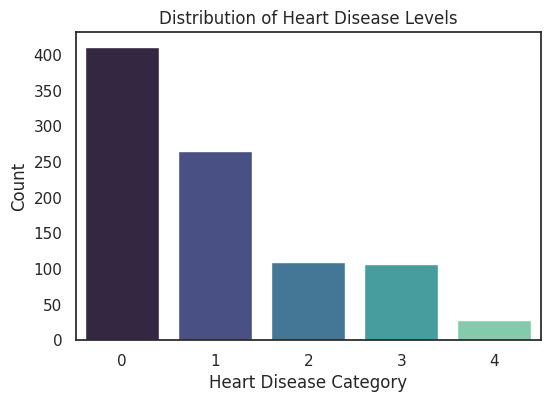

In [16]:
#explore Target Column (num)

print(f"\nUnique values in the 'num' column: sorted{(heart["num"].unique())}")
print(f"\nValue counts of the 'num' column: \n{heart["num"].value_counts()}")
print(f"\nPercentage of each value in the 'num' column: \n{heart["num"].value_counts(normalize=True) * 100}")

sns.set(style="white")


plt.figure(figsize=(6,4))
sns.countplot(x='num', data=heart, palette='mako')
plt.title('Distribution of Heart Disease Levels')
plt.xlabel('Heart Disease Category')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-1831874300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='age', data=heart, palette='Set2')


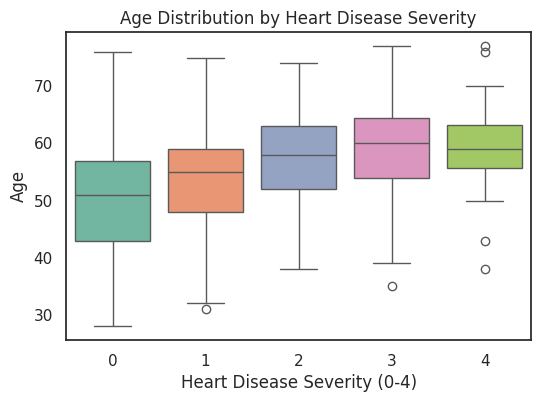

In [17]:
#Age vs Heart Disease

plt.figure(figsize=(6,4))
sns.boxplot(x='num', y='age', data=heart, palette='Set2')
plt.title('Age Distribution by Heart Disease Severity')
plt.xlabel('Heart Disease Severity (0-4)')
plt.ylabel('Age')
plt.show()


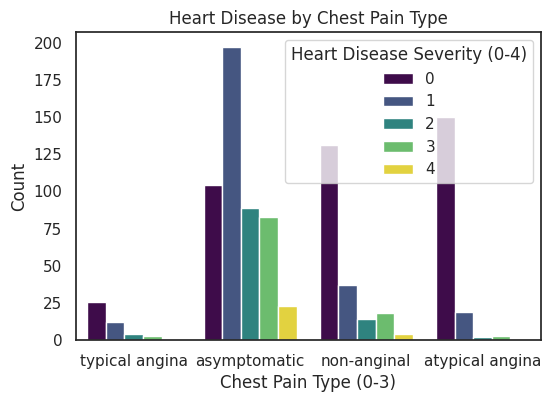

In [18]:
#Chest Pain Type vs Heart Disease

if 'cp' in heart.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='cp', hue='num', data=heart, palette='viridis')
    plt.title('Heart Disease by Chest Pain Type')
    plt.xlabel('Chest Pain Type (0-3)')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Severity (0-4)', loc='upper right')
    plt.show()

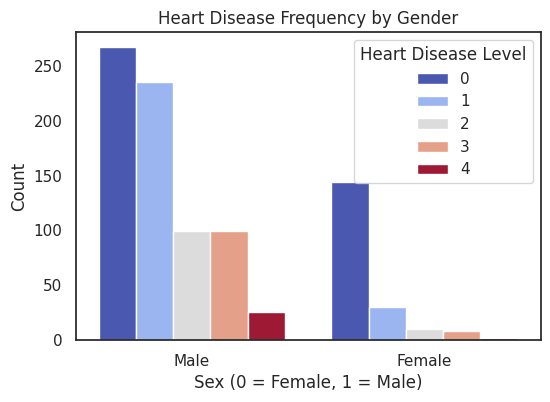

In [19]:
#Sex vs Heart Disease

plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='num', data=heart, palette='coolwarm')
plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease Level')
plt.show()


/tmp/ipython-input-1746469818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='chol', data=heart, palette='coolwarm')


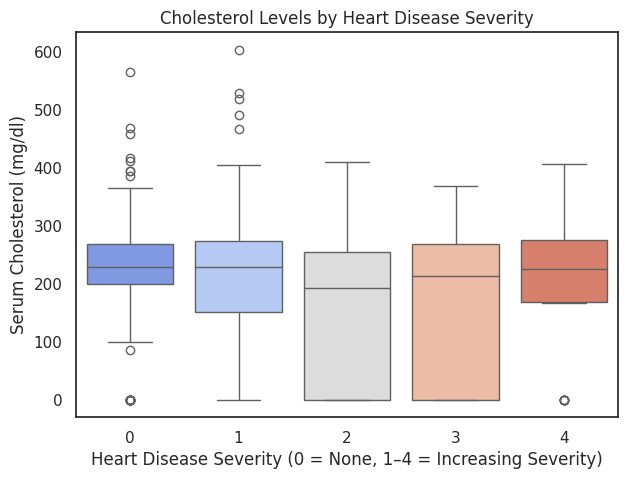

In [20]:
# Cholesterol vs Heart Disease

plt.figure(figsize=(7,5))
sns.boxplot(x='num', y='chol', data=heart, palette='coolwarm')
plt.title('Cholesterol Levels by Heart Disease Severity')
plt.xlabel('Heart Disease Severity (0 = None, 1–4 = Increasing Severity)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()

# Feature Engineering

In [21]:
#encode categorical columns for KNNImputer

encoder = LabelEncoder()
for col in cat_cols:
    heart[col] = heart[col].astype(str)
    heart[col] = encoder.fit_transform(heart[col])

#apply KNN Imputer (handles numeric columns including ca, and encoded thal)
imputer = KNNImputer(n_neighbors=5)
heart = pd.DataFrame(imputer.fit_transform(heart), columns=heart.columns)


In [22]:
#round columns that should contain whole numbers

for col in ['ca', 'thal', 'slope', 'sex', 'fbs', 'restecg', 'exang', 'cp']:
    if col in heart.columns:
            heart[col] = heart[col].round(0).astype(int)


#Convert Multi-Class Target to Binary and Check for Balance

In [23]:
#convert Multi-Class Target to Binary

heart['num'] = heart['num'].apply(lambda x: 1 if x > 0 else 0)


In [24]:
#check for balance
print("\nTarget distribution after conversion:")
print(heart['num'].value_counts())


Target distribution after conversion:
num
1    509
0    411
Name: count, dtype: int64


In [25]:
#checking for missing values again

heart.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [26]:
#removing the columns that is unnecessary for the Model

heart.drop(['id', 'dataset'], axis=1, inplace=True)

In [27]:
heart.shape

(920, 14)

#Check for Outliers

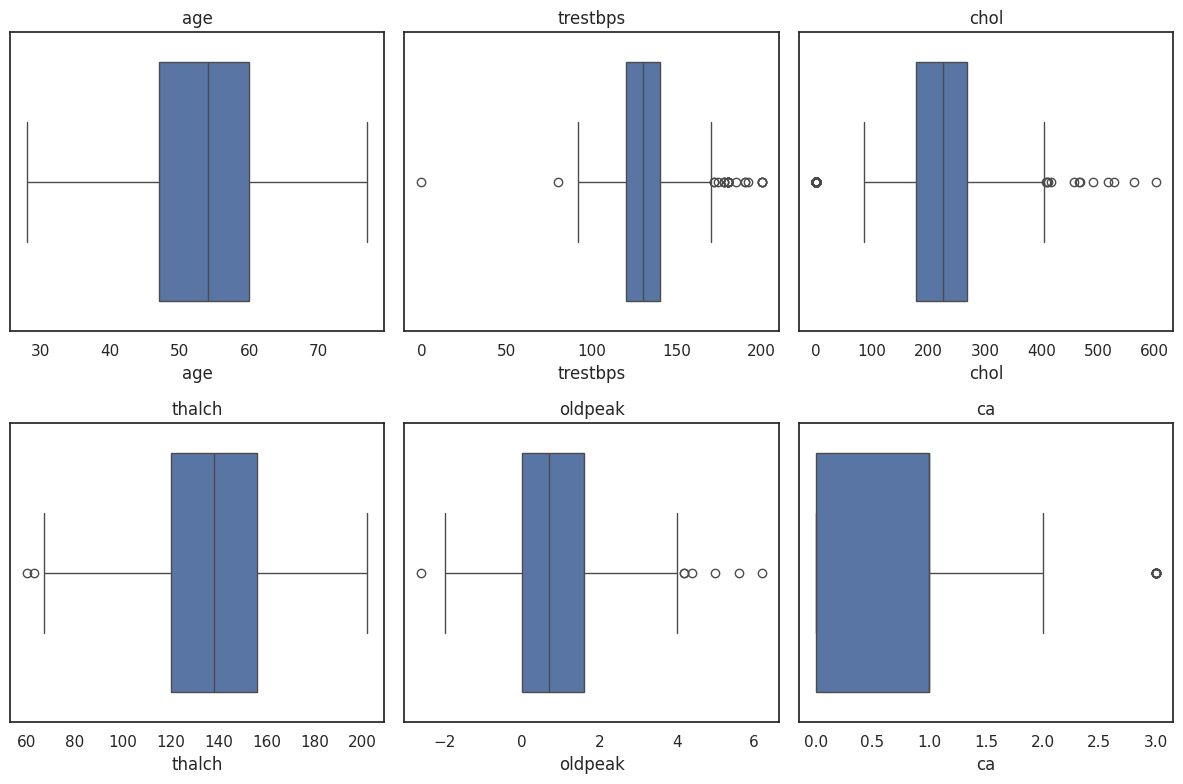

In [28]:
#checking for outliers

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
#capping the outliers using the 1st and 99th percentile

for col in ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
      lower_limit = heart[col].quantile(0.01)
      upper_limit = heart[col].quantile(0.99)
      heart[col] = np.clip(heart[col], lower_limit, upper_limit)

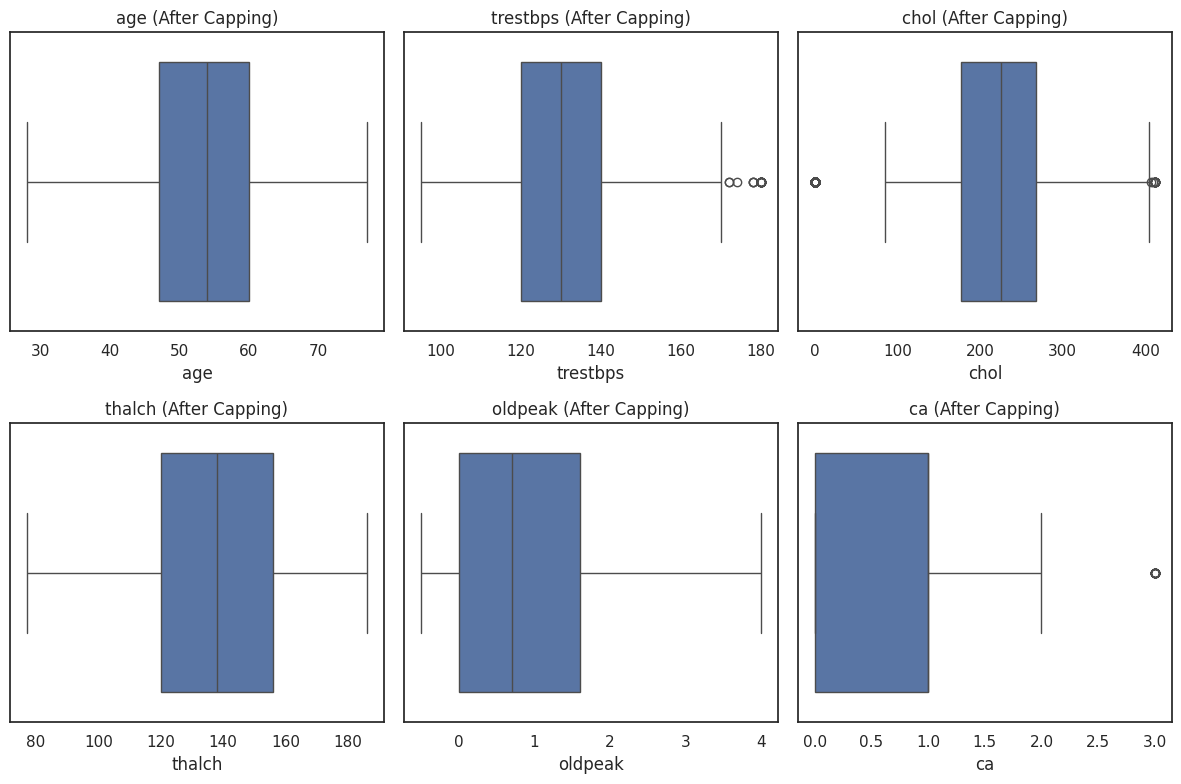

In [30]:
#after capping

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart[col])
    plt.title(f'{col} (After Capping)')
plt.tight_layout()
plt.show()

#Data Splitting

In [31]:
#define features X and target y

X = heart.drop('num', axis=1)
y = heart['num']



In [32]:
#features

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67.0,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3,2
2,67.0,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2,3
3,37.0,1,2,130.0,250.0,0,2,186.0,0,3.5,0,0,2
4,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0,0,127.0,333.0,1,3,154.0,0,0.0,2,1,1
916,62.0,1,3,148.8,139.0,0,3,133.2,2,1.8,2,1,1
917,55.0,1,0,122.0,223.0,1,3,100.0,0,0.0,2,1,0
918,58.0,1,0,136.2,385.0,1,0,133.4,2,0.6,2,1,1


In [33]:
#target

y

,num
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [34]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [35]:
#scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Models Initializing and Evaluation

In [36]:
#initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

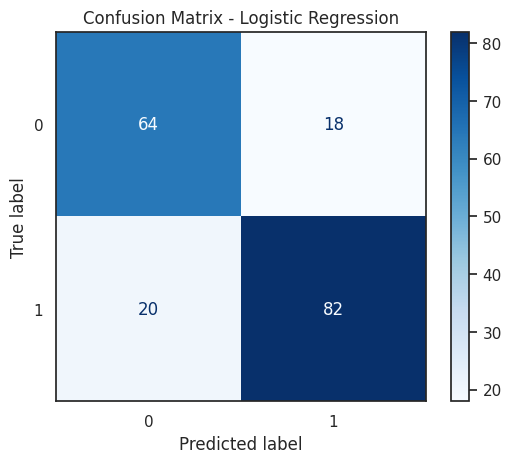

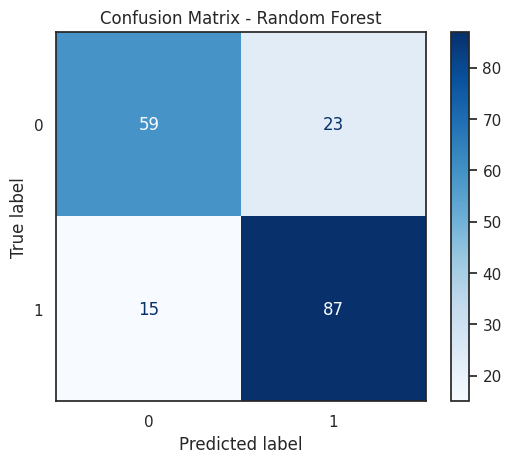

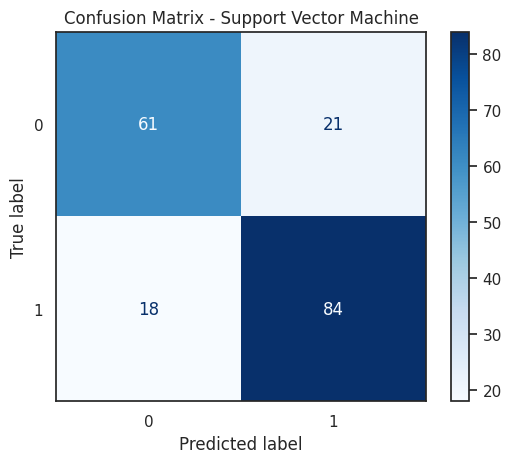

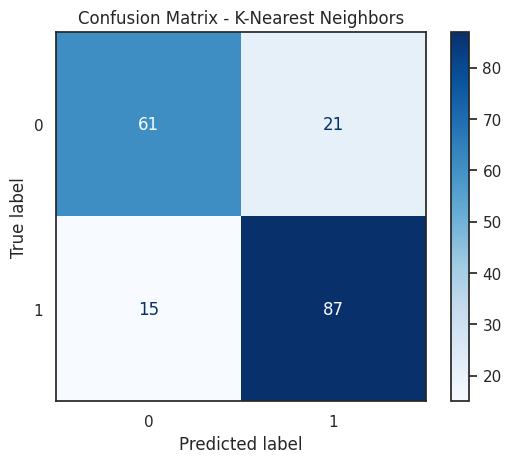

                    Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0     Logistic Regression     0.793      0.820   0.804     0.812    0.860   
1           Random Forest     0.793      0.791   0.853     0.821    0.875   
2  Support Vector Machine     0.788      0.800   0.824     0.812    0.859   
3     K-Nearest Neighbors     0.804      0.806   0.853     0.829    0.829   

   CV Mean Accuracy  
0             0.820  
1             0.822  
2             0.712  
3             0.685  


In [37]:
#store results

results = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(cmap='Blues')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  results.append({
      "Model": name,
      "Accuracy": round(accuracy, 3),
      "Precision": round(precision, 3),
      "Recall": round(recall, 3),
      "F1-Score": round(f1, 3),
      "ROC-AUC": round(roc_auc, 3),
      "CV Mean Accuracy": round(cv_scores.mean(), 3)
  })

results_df = pd.DataFrame(results)
print(results_df)

In [38]:
#compare results

results_df = pd.DataFrame(results)
print(results_df)


                    Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0     Logistic Regression     0.793      0.820   0.804     0.812    0.860   
1           Random Forest     0.793      0.791   0.853     0.821    0.875   
2  Support Vector Machine     0.788      0.800   0.824     0.812    0.859   
3     K-Nearest Neighbors     0.804      0.806   0.853     0.829    0.829   

   CV Mean Accuracy  
0             0.820  
1             0.822  
2             0.712  
3             0.685  


#Models Comparison

/tmp/ipython-input-3137167962.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


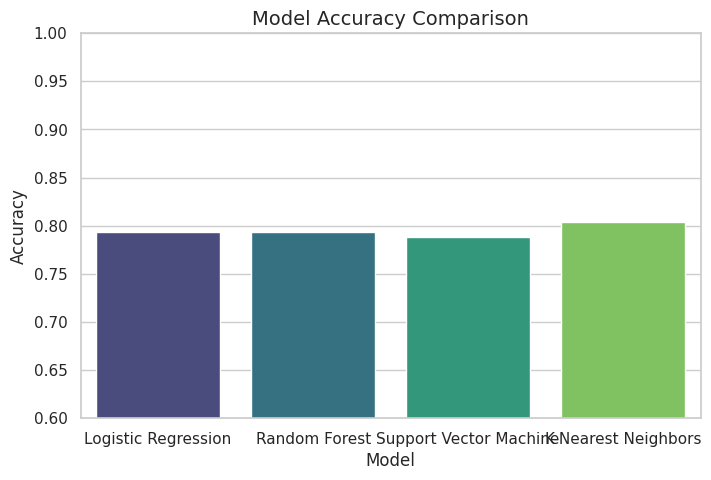

/tmp/ipython-input-3137167962.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision", data=results_df, palette="crest")


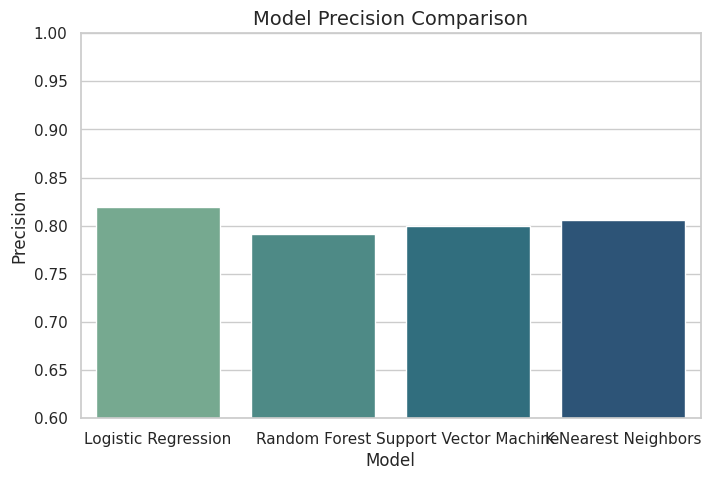

/tmp/ipython-input-3137167962.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall", data=results_df, palette="flare")


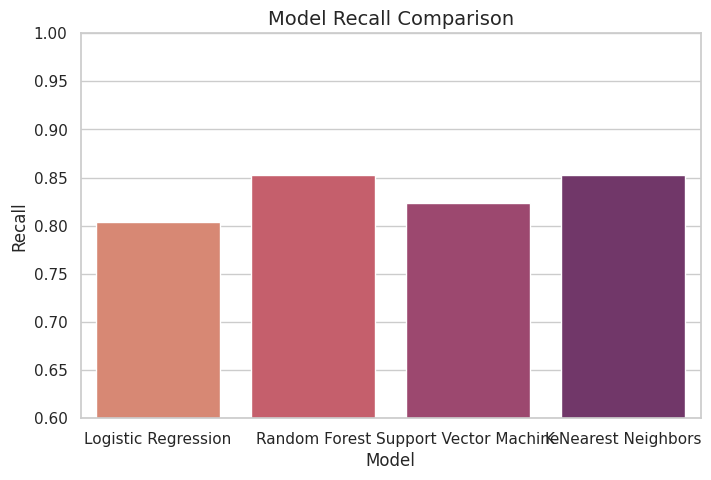

/tmp/ipython-input-3137167962.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="mako")


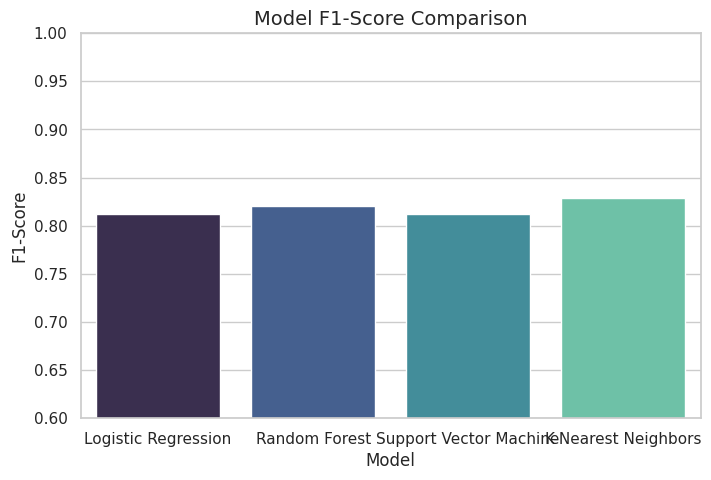

/tmp/ipython-input-3137167962.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="coolwarm")


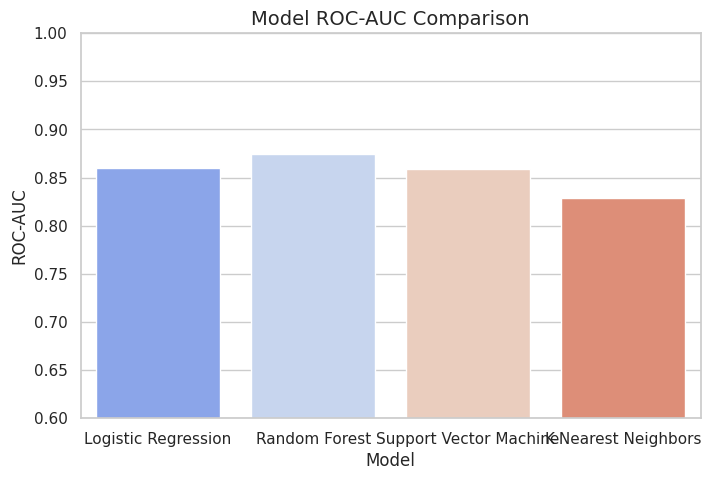


✅ Model performance visualizations complete!


In [39]:
#Visual Comparison of All Model

# Set visual style
sns.set(style="whitegrid")

# --- Accuracy Comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0.6, 1.0)
plt.show()


# --- Precision Comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Precision", data=results_df, palette="crest")
plt.title("Model Precision Comparison", fontsize=14)
plt.ylim(0.6, 1.0)
plt.show()

# --- Recall Comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Recall", data=results_df, palette="flare")
plt.title("Model Recall Comparison", fontsize=14)
plt.ylim(0.6, 1.0)
plt.show()

# --- F1-Score Comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="mako")
plt.title("Model F1-Score Comparison", fontsize=14)
plt.ylim(0.6, 1.0)
plt.show()

# --- ROC-AUC Comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="coolwarm")
plt.title("Model ROC-AUC Comparison", fontsize=14)
plt.ylim(0.6, 1.0)
plt.show()

print("\n✅ Model performance visualizations complete!")

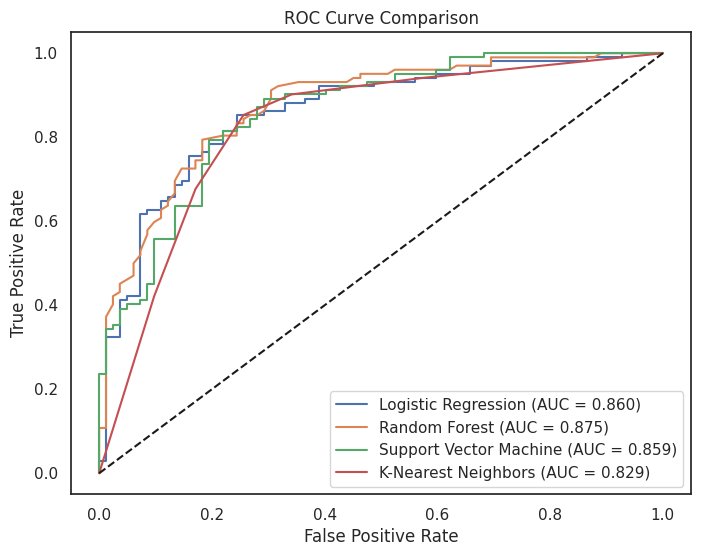

In [40]:
#ROC Curve Comparison
sns.set(style="white")

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()